In [55]:
import sqlite3
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import numpy as np

connection = sqlite3.connect('Northwind_small.sqlite')
cursor = connection.cursor()

def sql_select_to_df(SQL_COMMAND, cursor=cursor):
    results = cursor.execute(SQL_COMMAND).fetchall()
    df = pd.DataFrame(results)
    df.columns = [i[0] for i in cursor.description]
    return df

#### Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

In [56]:
orderDetail_df = sql_select_to_df("""select * from OrderDetail;""")

non_discounted_df = orderDetail_df.loc[orderDetail_df['Discount'] == 0]
discounted_df = orderDetail_df.loc[orderDetail_df['Discount'] != 0]

#mean_quantity_non_discounted = non_discounted_df['Quantity'].mean()

t_denominator_1 = stddev_non_discounted**2/sample_size_non_discounted
t_denominator_2 = stddev_discounted**2/sample_size_discounted

t = (mean_non_discounted - mean_discounted)/math.sqrt(t_denominator_1 + t_denominator_2)
t

degrees_freedom = sample_size_discounted

p = 1 - stats.t.cdf(t,df=degrees_freedom)
p

/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


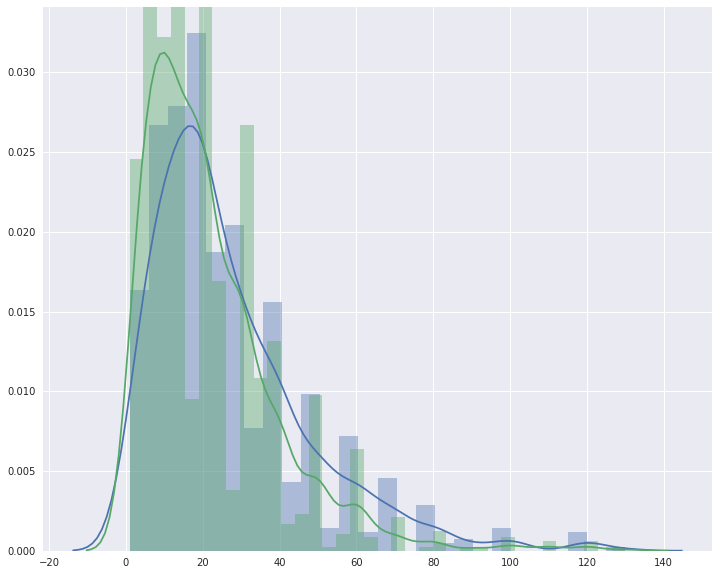

In [57]:
discounted = discounted_df['Quantity'].values
non_discounted = non_discounted_df['Quantity'].values

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(discounted) # Blue distribution
sns.distplot(non_discounted) # Green distribution

### Null Hypothesis

Discounts have no statistically significant effect on the number of products customers order.

### Alternate Hypothesis

Discounts have a statistically significant effect on the number of products customers order.

In [59]:
discounted.mean()
non_discounted.mean()
discounted.mean() - non_discounted.mean()

5.394523243866239

$$ t = \frac{\bar{x}{1} - \bar{x}{2}}{\sqrt{s^{2} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) } } $$


$$ s^{2} = \frac{\sum_{i=1}^{n_{1}}(x_{i} - \bar{x}{1})^{2} + \sum{j=1}^{n_{2}}(x_{j} - \bar{x}{2})^{2} } {n{1} + n_{2} -2} $$

In [74]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = variance(sample1), variance(sample2)
    return (var_1 + var_2)/((n_1 + n_2)-2)

def twosample_tstatistic(disc, non_disc):
    disc_mean, non_disc_mean = np.mean(disc), np.mean(non_disc)
    samp_var = sample_variance(disc, non_disc)
    n_d, n_n = len(disc), len(non_disc)
    num = disc_mean - non_disc_mean
    denom = np.sqrt(samp_var * ((1/n_d)+(1/n_n)))
    return num / denom

def get_sample_sizes(disc, non_disc):
    n_1, n_2 = len(disc), len(non_disc)
    print(n_1, n_2)

In [72]:
t_stat = twosample_tstatistic(discounted, non_discounted)
t_stat

6.478563196294904

In [78]:
p = stats.t.sf(abs(t_stat), len(discounted)+len(non_discounted)-1) * 2
p

1.1439815448583801e-10